In [35]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


In [36]:
# dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())


   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0           0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0      195    106     70  26.97         80       77   

   TenYearCHD  
0           0   (1, 15)
TenYearCHD
0    1
Name: count, dtype: int64


C:\Users\shree\AppData\Local\Temp\ipykernel_8820\1905227720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='TenYearCHD', data=disease_df,


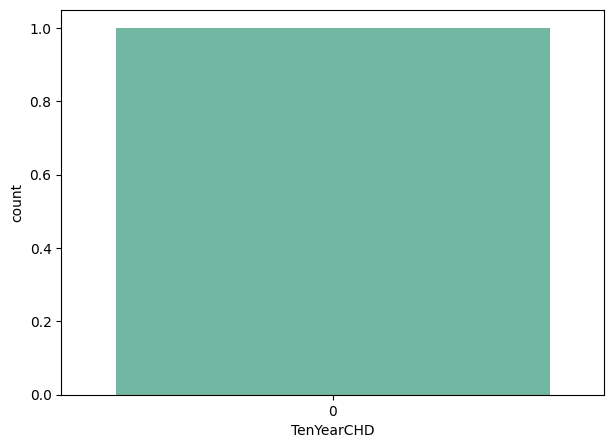

In [37]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=disease_df,
			palette="BuGn_r")
plt.show()


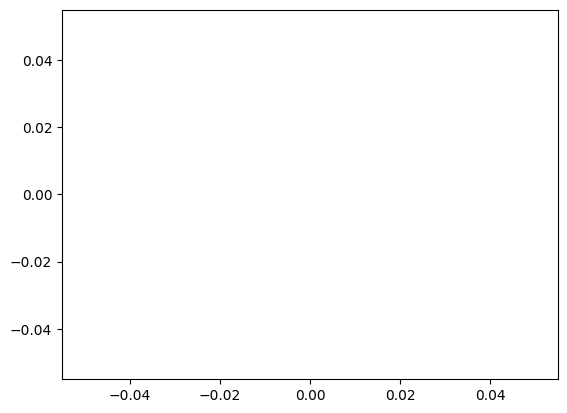

In [38]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


In [39]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
						'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
		X, y, test_size = 0.3, random_state = 4)


print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print('')
print('Accuracy of the model is = ', accuracy)



Accuracy of the model is =  0.8490230905861457


In [41]:
# This code is contributed by @amartajisce
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)


Accuracy of the model is =  84.36944937833037


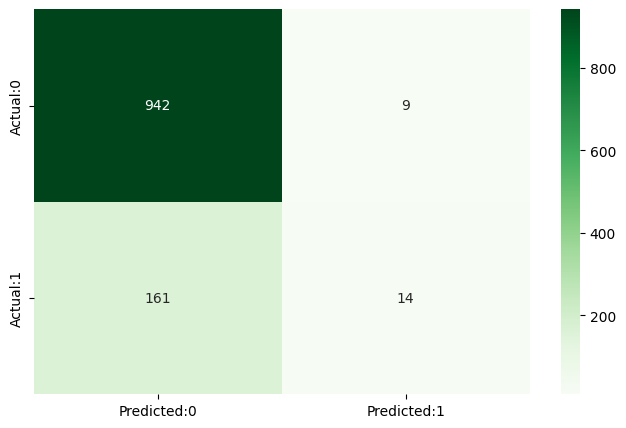

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [42]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
						columns = ['Predicted:0', 'Predicted:1'], 
						index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


